In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("fetal_health.csv")

In [3]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.fetal_health.value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

## abnormal_short_term_variability
* Anormal Kısa Vadeli Değişkenlik
* Fetal kalp atışındaki hızlı dalgalanmaların normalden sapması. Düşük değişkenlik oksijen eksikliğini gösterebilir. Bu, fetal iyilik hali açısından kritik bir ölçüttür.

In [8]:
df["abnormal_değerler"]=""

In [9]:
df.loc[df["abnormal_short_term_variability"] < 10, "abnormal_değerler"] = "-10"
df.loc[(df["abnormal_short_term_variability"] >= 10) & (df["abnormal_short_term_variability"] < 21), "abnormal_değerler"] = "10-20"
df.loc[(df["abnormal_short_term_variability"] >= 21) & (df["abnormal_short_term_variability"] < 31), "abnormal_değerler"] = "21-30"
df.loc[(df["abnormal_short_term_variability"] >= 31) & (df["abnormal_short_term_variability"] < 41), "abnormal_değerler"] = "31-40"
df.loc[(df["abnormal_short_term_variability"] >= 41) & (df["abnormal_short_term_variability"] < 51), "abnormal_değerler"] = "41-50"
df.loc[(df["abnormal_short_term_variability"] >= 51) & (df["abnormal_short_term_variability"] < 61), "abnormal_değerler"] = "51-60"
df.loc[(df["abnormal_short_term_variability"] >= 61) & (df["abnormal_short_term_variability"] < 71), "abnormal_değerler"] = "61-70"
df.loc[(df["abnormal_short_term_variability"] >= 71) & (df["abnormal_short_term_variability"] < 81), "abnormal_değerler"] = "71-80"
df.loc[df["abnormal_short_term_variability"] >= 81, "abnormal_değerler"] = "80+"

In [10]:
df["abnormal_değerler"].unique()

array(['71-80', '10-20', '21-30', '80+', '61-70', '31-40', '41-50',
       '51-60'], dtype=object)

In [11]:
anormal_kisa_vadeli_degiskenlik = df["abnormal_değerler"].unique()
fetal_sagligi = df["fetal_health"].unique()

#sözlük içinde sözlük oluşturma
analiz = {degiskenlik: {saglik: 0 for saglik in fetal_sagligi} for degiskenlik in anormal_kisa_vadeli_degiskenlik}

for durum in anormal_kisa_vadeli_degiskenlik:
    for saglik in fetal_sagligi:
        count = df[(df["abnormal_değerler"] == durum) & (df["fetal_health"] == saglik)].shape[0]
        analiz[durum][saglik]=count

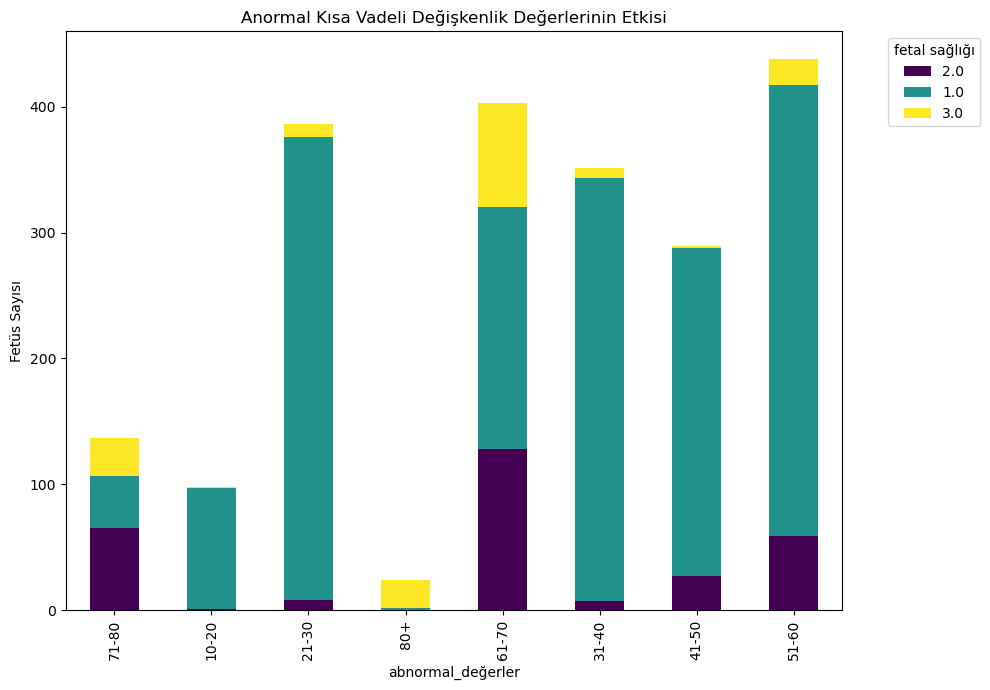

In [14]:
df3 =pd.DataFrame(analiz).T  # DataFrame'e çevir ve Transpose yaparak yaş gruplarını satır yap
df3.index.name= 'abnormal_short_term_variability'
# Grafik çizme
df3.plot(kind="bar", stacked=True, figsize=(10, 7), colormap="viridis")
plt.title("Anormal Kısa Vadeli Değişkenlik Değerlerinin Etkisi")
plt.xlabel("abnormal_değerler")
plt.ylabel("Fetüs Sayısı")
plt.legend(title="fetal sağlığı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## mean_value_of_short_term_variability
* Kısa Vadeli Değişkenliğin Orta Değeri
* Fetal kalp atış hızındaki dalgalanmaların ortalama değeri. Normal aralıklarda olması, sağlıklı bir fetüsün işareti olarak kabul edilir.

In [24]:
df["mean_value_of_short_term_variability"].unique()

array([0.5, 2.1, 2.4, 5.9, 6.3, 0.3, 1.9, 2. , 1.4, 1.5, 2.3, 1.7, 2.5,
       0.4, 0.2, 4.4, 6. , 4.5, 6.9, 2.9, 3.4, 3.2, 3.7, 3.6, 2.2, 1.6,
       1.8, 4.7, 4.9, 5. , 7. , 1.3, 4.1, 5.4, 1.2, 0.8, 1.1, 0.9, 1. ,
       0.7, 2.8, 3.9, 5.2, 4.8, 4.3, 0.6, 5.3, 2.6, 3.3, 3.8, 2.7, 3.1,
       5.7, 4. , 3.5, 3. , 4.2])

In [25]:
df["mean_value_değerler"]=""

In [27]:
df.loc[df["mean_value_of_short_term_variability"] < 1, "mean_value_değerler"] = "-1"
df.loc[(df["mean_value_of_short_term_variability"] >= 1) & (df["mean_value_of_short_term_variability"] < 2), "mean_value_değerler"] = "1-1.9"
df.loc[(df["mean_value_of_short_term_variability"] >= 2) & (df["mean_value_of_short_term_variability"] < 3), "mean_value_değerler"] = "2-2.9"
df.loc[(df["mean_value_of_short_term_variability"] >= 3) & (df["mean_value_of_short_term_variability"] < 4), "mean_value_değerler"] = "3-3.9"
df.loc[(df["mean_value_of_short_term_variability"] >= 4) & (df["mean_value_of_short_term_variability"] < 5), "mean_value_değerler"] = "4-4.9"
df.loc[(df["mean_value_of_short_term_variability"] >= 5) & (df["mean_value_of_short_term_variability"] < 6), "mean_value_değerler"] = "5-5.9"
df.loc[df["mean_value_of_short_term_variability"] >= 6, "mean_value_değerler"] = "6+"

In [28]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,abnormal_değerler,mean_value_değerler
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,71-80,-1
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,10-20,2-2.9
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,10-20,2-2.9
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,10-20,2-2.9
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,10-20,2-2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0,71-80,-1
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0,71-80,-1
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0,71-80,-1
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0,71-80,-1


In [29]:
kisa_vadeli_degiskenlik_orta_deger = df["mean_value_değerler"].unique()
fetal_sagligi = df["fetal_health"].unique()

#sözlük içinde sözlük oluşturma
analiz2 = {orta_degiskenlik: {saglik: 0 for saglik in fetal_sagligi} for orta_degiskenlik in kisa_vadeli_degiskenlik_orta_deger}

for durum in kisa_vadeli_degiskenlik_orta_deger:
    for saglik in fetal_sagligi:
        count = df[(df["mean_value_değerler"] == durum) & (df["fetal_health"] == saglik)].shape[0]
        analiz2[durum][saglik]=count

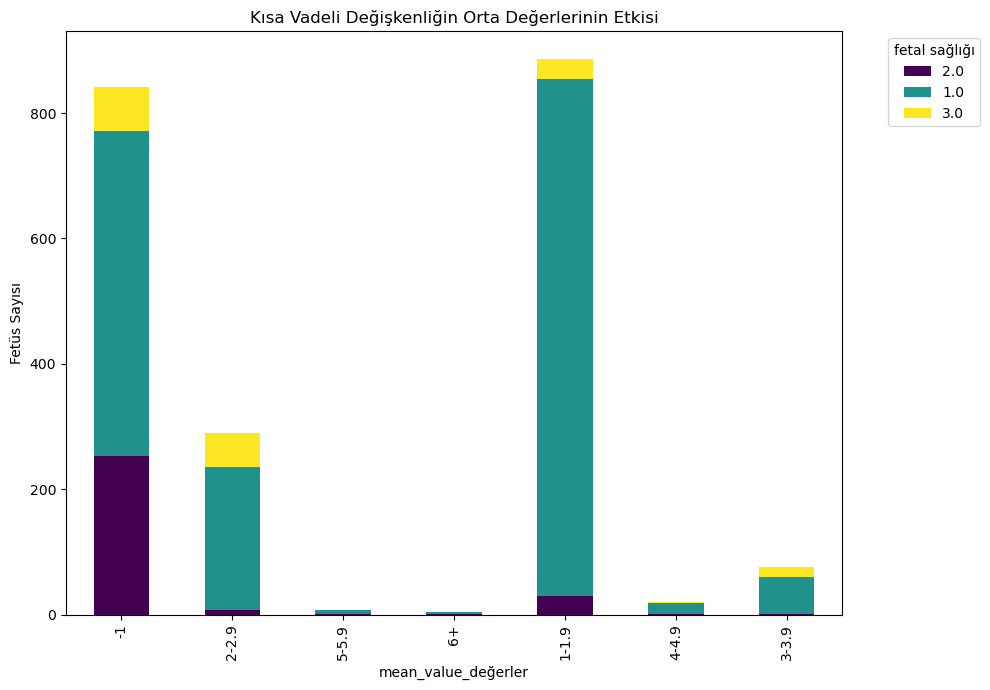

In [30]:
df3=pd.DataFrame(analiz2).T  # DataFrame'e çevir ve Transpose yaparak yaş gruplarını satır yap
df3.index.name= 'mean_value_of_short_term_variability'
# Grafik çizme
df3.plot(kind="bar", stacked=True, figsize=(10, 7), colormap="viridis")
plt.title("Kısa Vadeli Değişkenliğin Orta Değerlerinin Etkisi")
plt.xlabel("mean_value_değerler")
plt.ylabel("Fetüs Sayısı")
plt.legend(title="fetal sağlığı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## uterine_contractions
* Rahim Kasılmaları
* Doğum eylemi sırasında veya öncesinde rahmin kasılması. Kasılmaların sıklığı ve şiddeti, doğumun ne zaman başlayacağı hakkında bilgi verebilir. Ayrıca fetüsün rahim içindeki stresini değerlendirmek için önemlidir.

In [32]:
kasilmalar = df["uterine_contractions"].unique()
fetal_sagligi = df["fetal_health"].unique()

#sözlük içinde sözlük oluşturma
analiz3 = {kasilma: {saglik: 0 for saglik in fetal_sagligi} for kasilma in kasilmalar}

for durum in kasilmalar:
    for saglik in fetal_sagligi:
        count = df[(df["uterine_contractions"] == durum) & (df["fetal_health"] == saglik)].shape[0]
        analiz3[durum][saglik]=count

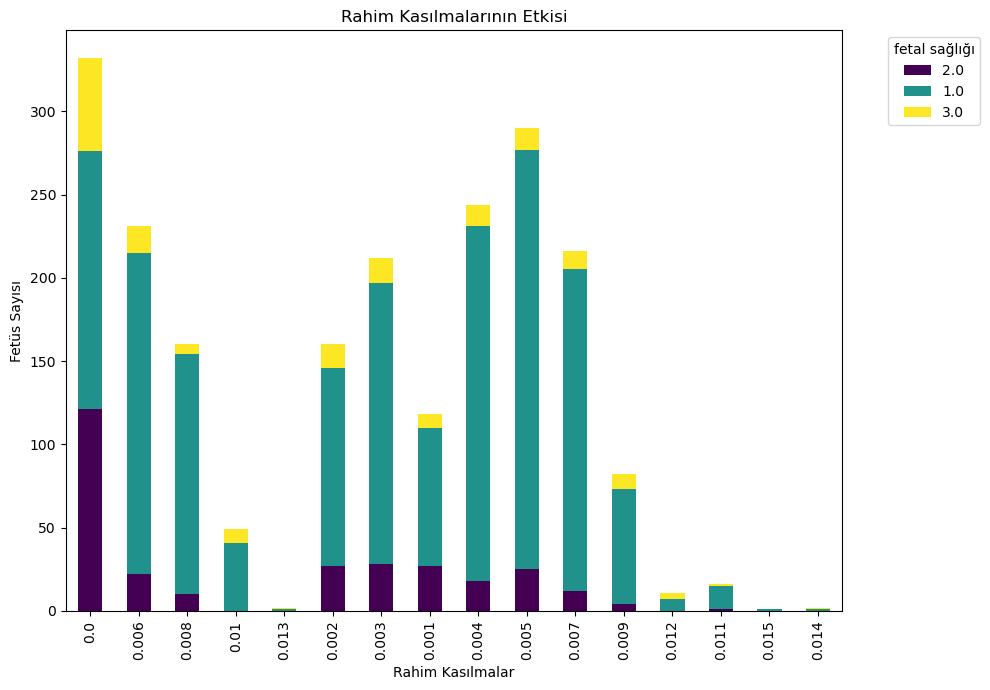

In [35]:
df3=pd.DataFrame(analiz3).T  # DataFrame'e çevir ve Transpose yaparak yaş gruplarını satır yap
df3.index.name= 'uterine_contractions'
# Grafik çizme
df3.plot(kind="bar", stacked=True, figsize=(10, 7), colormap="viridis")
plt.title("Rahim Kasılmalarının Etkisi")
plt.xlabel("Rahim Kasılmalar")
plt.ylabel("Fetüs Sayısı")
plt.legend(title="fetal sağlığı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## fetal_movement
* Fetal Hareket
* Fetüsün anne karnındaki hareketleri. Fetüsün aktivite düzeyi, genel sağlığı ve oksijen alım durumu hakkında bilgi verebilir. Azalan hareket, sorunların habercisi olabilir.

In [41]:
hareketler = df["fetal_movement"].value_counts()
hareketler = hareketler[hareketler > 30].index

#hareketler = df["fetal_movement"].unique()
fetal_sagligi = df["fetal_health"].unique()

#sözlük içinde sözlük oluşturma
analiz4 = {hareket: {saglik: 0 for saglik in fetal_sagligi} for hareket in hareketler}

for durum in hareketler:
    for saglik in fetal_sagligi:
        count = df[(df["fetal_movement"] == durum) & (df["fetal_health"] == saglik)].shape[0]
        analiz4[durum][saglik]=count

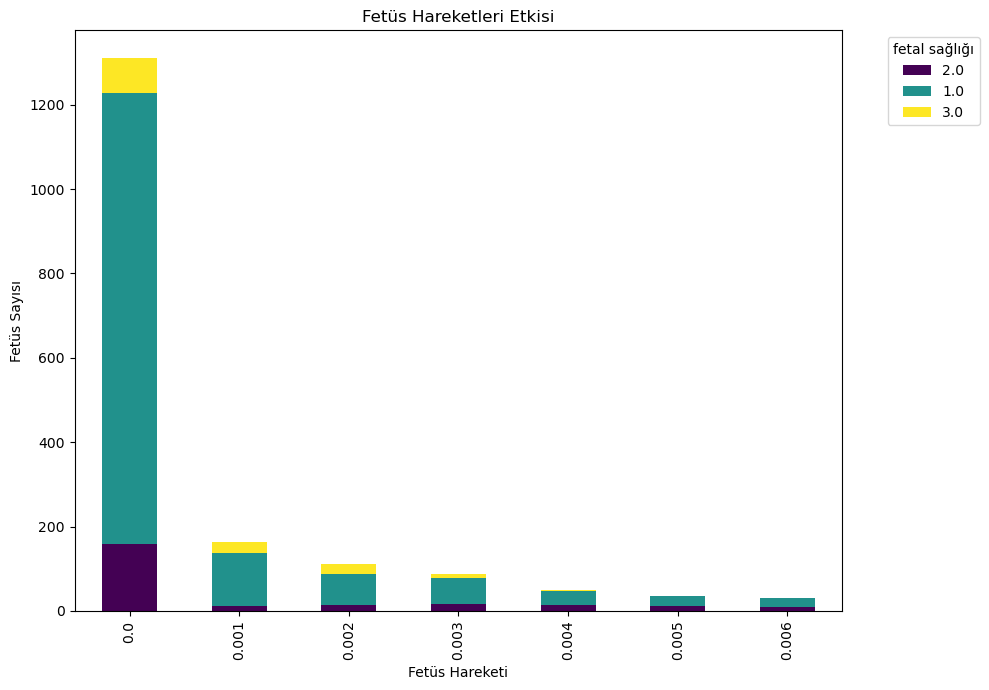

In [43]:
df3=pd.DataFrame(analiz4).T  # DataFrame'e çevir ve Transpose yaparak yaş gruplarını satır yap
df3.index.name= 'fetal_movement'
# Grafik çizme
df3.plot(kind="bar", stacked=True, figsize=(10, 7), colormap="viridis")
plt.title("Fetüs Hareketleri Etkisi")
plt.xlabel("Fetüs Hareketi")
plt.ylabel("Fetüs Sayısı")
plt.legend(title="fetal sağlığı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## baseline value
* Temel Değer İvmeleri
* Fetal kalp atış hızında görülen ani artışlar. Genelde fetüsün iyi durumda olduğunu gösterir. 15 saniye veya daha uzun süren ve en az 15 vuruş/dakika artış gösteren ivmeler sağlıklı bir fetüsün işareti olabilir. Anne karnındaki bebeğin kalp atış hızı FHR terimiyle belirtilir. Kalp atış hızı, bebeğin genel sağlık durumuyla ilgili birçok durumun önemli bir belirtisi olduğu için, düzenli olarak ölçümlenmelidir. FHR ölçümünün normal değer aralığı 120 ile 160 olarak bilinmektedir.

In [46]:
df["baseline value"].unique()

array([120., 132., 133., 134., 122., 151., 150., 131., 130., 129., 128.,
       124., 115., 114., 116., 158., 156., 148., 149., 146., 144., 142.,
       136., 141., 138., 140., 154., 145., 139., 125., 123., 159., 143.,
       119., 121., 127., 126., 118., 135., 137., 147., 157., 117., 152.,
       112., 106., 110., 160.])

In [48]:
df["kalp_atis"]=""

In [49]:
df.loc[df["baseline value"] < 121, "kalp_atis"] = "100-120"
df.loc[(df["baseline value"] >= 121) & (df["baseline value"] < 131), "kalp_atis"] = "121-130"
df.loc[(df["baseline value"] >= 131) & (df["baseline value"] < 141), "kalp_atis"] = "131-140"
df.loc[(df["baseline value"] >= 141) & (df["baseline value"] < 151), "kalp_atis"] = "141-150"
df.loc[(df["baseline value"] >= 151) & (df["baseline value"] < 161), "kalp_atis"] = "151-160"
df.loc[df["baseline value"] >= 161, "kalp_atis"] = "160+"

In [52]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,abnormal_değerler,mean_value_değerler,kalp_atis
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,0.0,120.0,137.0,121.0,73.0,1.0,2.0,71-80,-1,100-120
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,1.0,141.0,136.0,140.0,12.0,0.0,1.0,10-20,2-2.9,131-140
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,1.0,141.0,135.0,138.0,13.0,0.0,1.0,10-20,2-2.9,131-140
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,134.0,137.0,13.0,1.0,1.0,10-20,2-2.9,131-140
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,0.0,137.0,136.0,138.0,11.0,1.0,1.0,10-20,2-2.9,131-140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,0.0,153.0,150.0,152.0,2.0,0.0,2.0,71-80,-1,131-140
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,0.0,152.0,148.0,151.0,3.0,1.0,2.0,71-80,-1,131-140
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,0.0,153.0,148.0,152.0,4.0,1.0,2.0,71-80,-1,131-140
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,0.0,152.0,147.0,151.0,4.0,1.0,2.0,71-80,-1,131-140


In [55]:
kalp_atis = df["kalp_atis"].unique()
fetal_sagligi = df["fetal_health"].unique()

#sözlük içinde sözlük oluşturma
analiz5 = {atis: {saglik: 0 for saglik in fetal_sagligi} for atis in kalp_atis}

for durum in kalp_atis:
    for saglik in fetal_sagligi:
        count = df[(df["kalp_atis"] == durum) & (df["fetal_health"] == saglik)].shape[0]
        analiz5[durum][saglik]=count

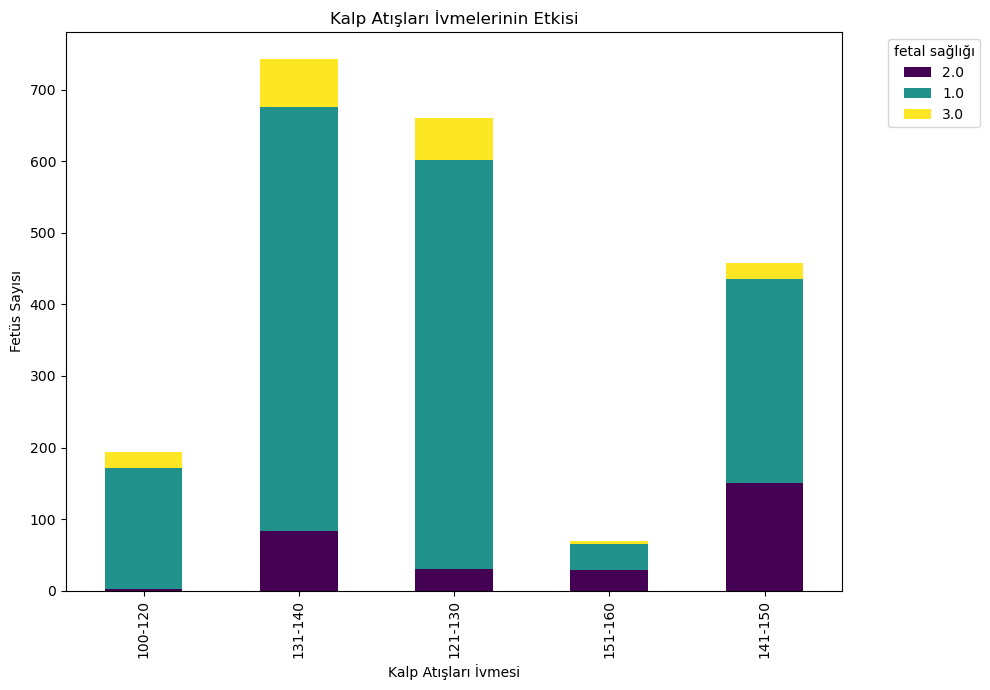

In [57]:
df3=pd.DataFrame(analiz5).T  # DataFrame'e çevir ve Transpose yaparak yaş gruplarını satır yap
df3.index.name= 'kalp_atis'
# Grafik çizme
df3.plot(kind="bar", stacked=True, figsize=(10, 7), colormap="viridis")
plt.title("Kalp Atışları İvmelerinin Etkisi")
plt.xlabel("Kalp Atışları İvmesi")
plt.ylabel("Fetüs Sayısı")
plt.legend(title="fetal sağlığı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Baseline Value Değerlerine göre Fetus Değerleri

In [61]:
# Fetus sağlığı 1 olan fetüsleri filtreleme
fetal_saglik1 = df[df["fetal_health"] == 1]
en_yuksek_5 = fetal_saglik1.nlargest(5, "baseline value")
# Sonuçlar
print(en_yuksek_5)


      baseline value  accelerations  fetal_movement  uterine_contractions  \
1757           160.0          0.010             0.0                 0.008   
133            159.0          0.001             0.0                 0.008   
134            159.0          0.002             0.0                 0.010   
136            159.0          0.002             0.0                 0.010   
140            159.0          0.000             0.0                 0.006   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1757                  0.0                   0.0                       0.0   
133                   0.0                   0.0                       0.0   
134                   0.0                   0.0                       0.0   
136                   0.0                   0.0                       0.0   
140                   0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variabilit

In [63]:
# Fetus sağlığı 1 olan fetüsleri filtreleme
fetal_saglik1 = df[df["fetal_health"] == 1]
en_dusuk = fetal_saglik1.nsmallest(5, "baseline value")
# Sonuçlar
print(en_dusuk)


      baseline value  accelerations  fetal_movement  uterine_contractions  \
1659           106.0          0.011             0.0                 0.009   
1660           106.0          0.000             0.0                 0.010   
1661           106.0          0.000             0.0                 0.010   
1662           106.0          0.001             0.0                 0.011   
1663           106.0          0.000             0.0                 0.010   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1659                  0.0                   0.0                       0.0   
1660                  0.0                   0.0                       0.0   
1661                  0.0                   0.0                       0.0   
1662                  0.0                   0.0                       0.0   
1663                  0.0                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variabilit

In [65]:
# Fetus sağlığı 2 olan fetüsleri filtreleme
fetal_saglik1 = df[df["fetal_health"] == 2]
en_yuksek_5 = fetal_saglik1.nlargest(5, "baseline value")
# Sonuçlar
print(en_yuksek_5)

     baseline value  accelerations  fetal_movement  uterine_contractions  \
125           159.0            0.0             0.0                 0.003   
126           159.0            0.0             0.0                 0.004   
127           159.0            0.0             0.0                 0.003   
128           159.0            0.0             0.0                 0.003   
135           159.0            0.0             0.0                 0.008   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
125                  0.0                   0.0                       0.0   
126                  0.0                   0.0                       0.0   
127                  0.0                   0.0                       0.0   
128                  0.0                   0.0                       0.0   
135                  0.0                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
125     

In [67]:
# Fetus sağlığı 2 olan fetüsleri filtreleme
fetal_saglik1 = df[df["fetal_health"] == 2]
en_dusuk = fetal_saglik1.nsmallest(5, "baseline value")
# Sonuçlar
print(en_dusuk)


      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0            0.0           0.000                 0.000   
461            120.0            0.0           0.002                 0.000   
1380           121.0            0.0           0.000                 0.003   
124            123.0            0.0           0.000                 0.007   
243            123.0            0.0           0.000                 0.001   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                     0.000   
461                 0.000                   0.0                     0.000   
1380                0.005                   0.0                     0.002   
124                 0.005                   0.0                     0.002   
243                 0.000                   0.0                     0.000   

      abnormal_short_term_variability  mean_value_of_short_term_variabilit

In [69]:
# Fetus sağlığı 3 olan fetüsleri filtreleme
fetal_saglik1 = df[df["fetal_health"] == 3]
en_yuksek_5 = fetal_saglik1.nlargest(5, "baseline value")
# Sonuçlar
print(en_yuksek_5)

     baseline value  accelerations  fetal_movement  uterine_contractions  \
823           152.0            0.0           0.000                 0.003   
824           152.0            0.0           0.000                 0.002   
403           151.0            0.0           0.000                 0.000   
469           151.0            0.0           0.002                 0.000   
470           151.0            0.0           0.002                 0.000   

     light_decelerations  severe_decelerations  prolongued_decelerations  \
823                  0.0                   0.0                       0.0   
824                  0.0                   0.0                       0.0   
403                  0.0                   0.0                       0.0   
469                  0.0                   0.0                       0.0   
470                  0.0                   0.0                       0.0   

     abnormal_short_term_variability  mean_value_of_short_term_variability  \
823     

In [71]:
# Fetus sağlığı 3 olan fetüsleri filtreleme
fetal_saglik1 = df[df["fetal_health"] == 3]
en_dusuk = fetal_saglik1.nsmallest(5, "baseline value")
# Sonuçlar
print(en_dusuk)


      baseline value  accelerations  fetal_movement  uterine_contractions  \
1681           110.0          0.003           0.002                 0.006   
1682           110.0          0.004           0.000                 0.009   
1683           110.0          0.003           0.002                 0.007   
1684           110.0          0.002           0.003                 0.002   
1685           110.0          0.004           0.002                 0.005   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1681                0.007                   0.0                     0.002   
1682                0.007                   0.0                     0.002   
1683                0.007                   0.0                     0.002   
1684                0.009                   0.0                     0.002   
1685                0.008                   0.0                     0.001   

      abnormal_short_term_variability  mean_value_of_short_term_variabilit

## Histogram Değerlerinin Grafikleri

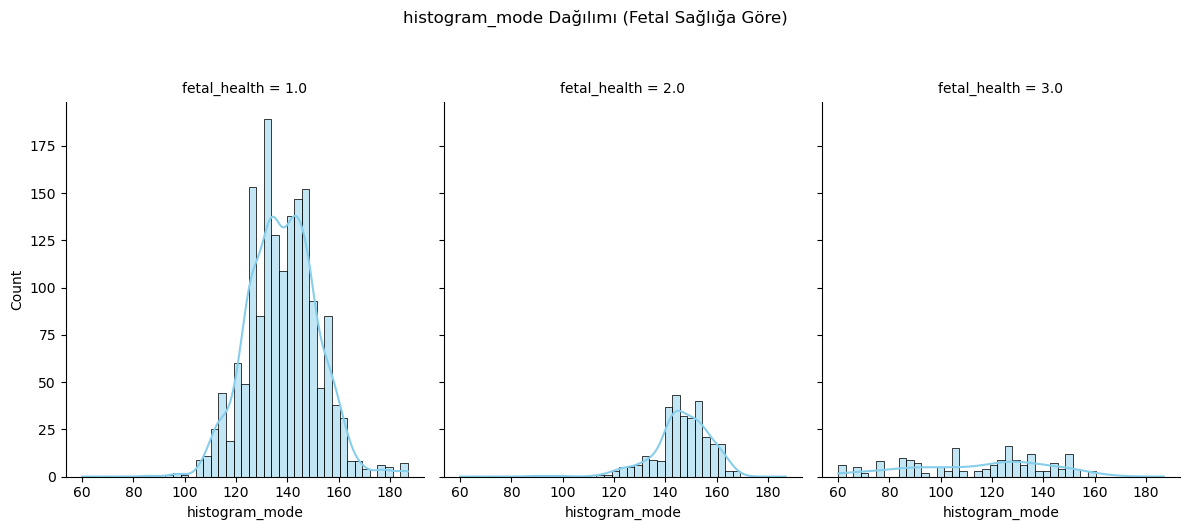

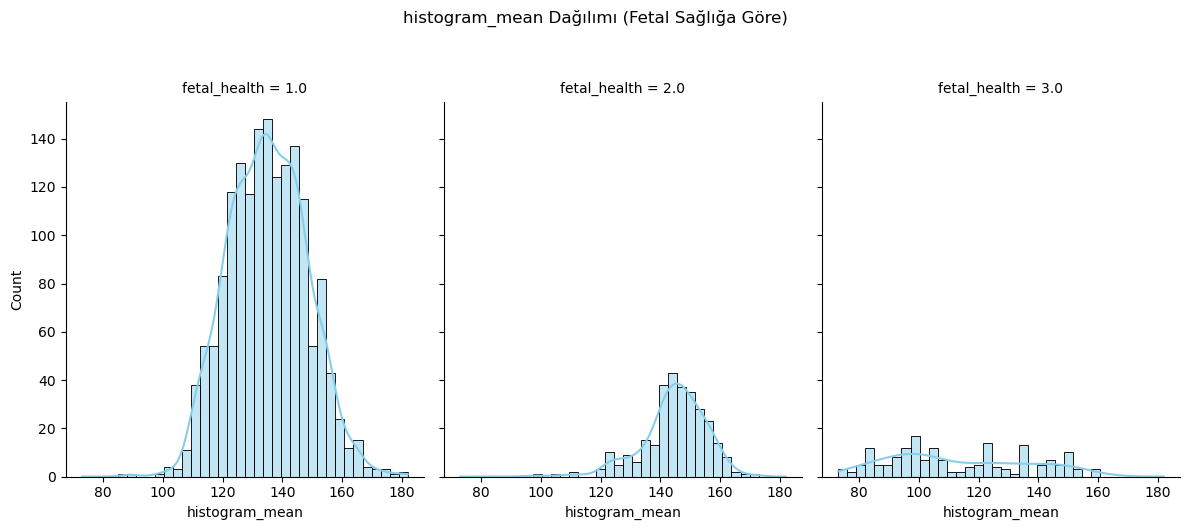

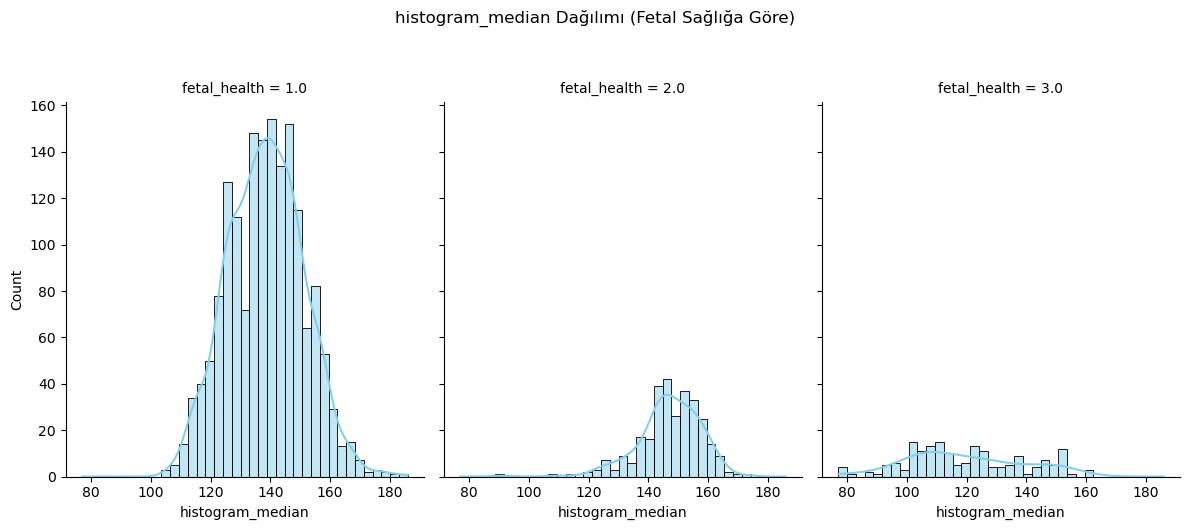

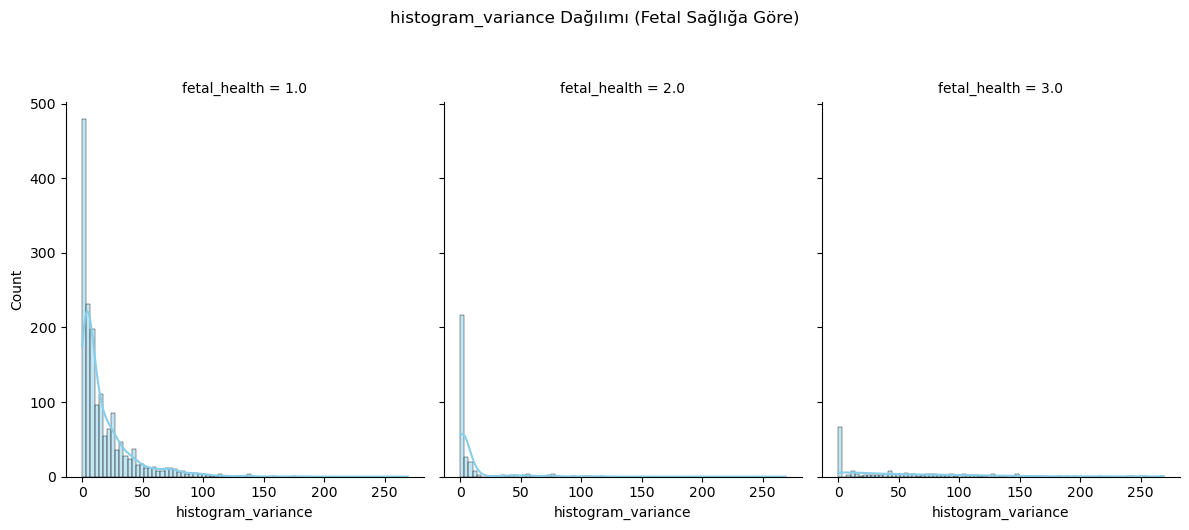

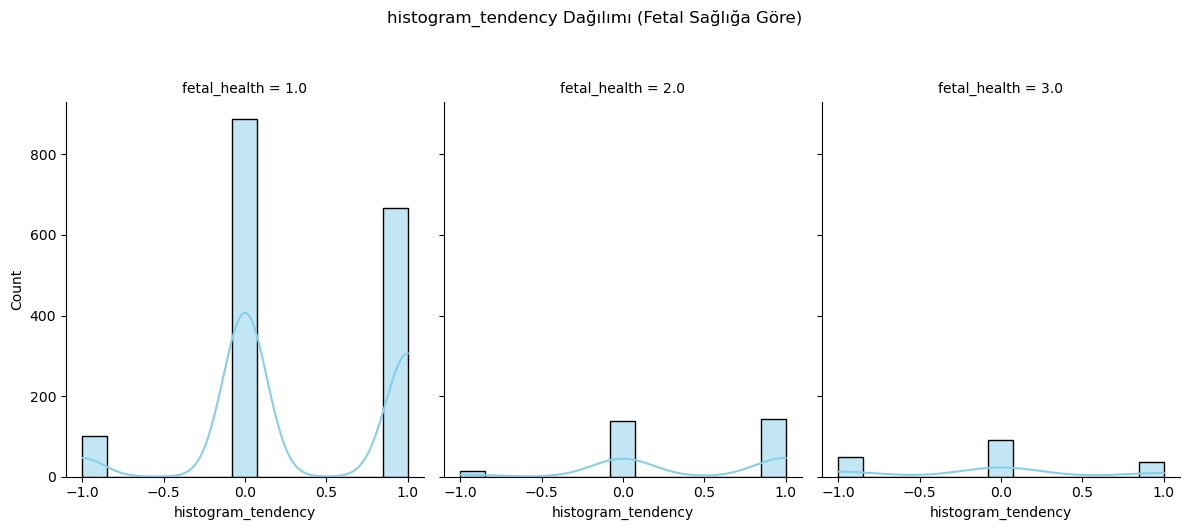

In [74]:
columns_to_plot = ["histogram_mode","histogram_mean","histogram_median","histogram_variance","histogram_tendency"]

for column in columns_to_plot:
    sns.displot(
        data=df,
        x=column,
        col="fetal_health",
        kind="hist",
        kde=True,
        color="skyblue",
        edgecolor="black",
        height=5,
        aspect=0.8
    )
    plt.suptitle(f"{column} Dağılımı (Fetal Sağlığa Göre)", y=1.05)  # Grafik başlığını üste ekliyor
    plt.xlabel(column)  # Ortak X ekseni etiketi
    plt.ylabel("Yoğunluk") # Ortak Y ekseni etiketi
    plt.tight_layout() # grafiklerin birbirine yapışmaması için
    plt.show()

baseline value: Fetal kalp atış hızının (FHR) temel değeri. Bebeğin kalp atış hızının, kasılmalar ve hareketler olmadan önceki ortalama değeridir.

accelerations: Fetal kalp atış hızındaki (FHR) hızlanmaların sayısı (örneğin, dakikadaki hızlanma sayısı) veya genliği (değer). Hızlanmalar, genellikle bebeğin iyi durumda olduğunu gösteren pozitif bir işarettir.

fetal_movement: Fetusun hareketlerinin kaydedildiği zaman yüzdesi veya hareket sayıları gibi bir değer. Fetal hareket, bebeğin iyi oluşunun bir göstergesidir.

uterine_contractions: Rahim kasılmalarının frekansı veya genliği (değer). Rahim kasılmaları doğum sürecini başlatır ve bebek için stres faktörü de olabilir.

light_decelerations: Fetal kalp atış hızındaki (FHR) hafif yavaşlamaların sayısı veya genliği (değer). Bu tür yavaşlamalar genellikle normal olarak kabul edilir.

severe_decelerations: Fetal kalp atış hızındaki (FHR) ciddi yavaşlamaların sayısı veya genliği (değer). Bu tür yavaşlamalar, bebeğin sağlığı açısından riskli olabilecek durumlara işaret edebilir.

prolongued_decelerations: Fetal kalp atış hızındaki (FHR) uzun süreli yavaşlamaların sayısı veya süresi. Bu tür yavaşlamalar da ciddi sağlık sorunlarına işaret edebilir.

abnormal_short_term_variability: Kısa dönemli fetal kalp atış hızı değişkenliğindeki anormalliklerin bir ölçüsüdür. Yüksek değerler anormallik gösterebilir.

mean_value_of_short_term_variability: Kısa dönemli değişkenliğin ortalama değeridir.

percentage_of_time_with_abnormal_long_term_variability: Uzun dönemli fetal kalp atış hızı değişkenliğindeki anormalliklerin zaman içindeki yüzdesidir. Yüksek değerler anormallik gösterebilir.

mean_value_of_long_term_variability: Uzun dönemli değişkenliğin ortalama değeridir.

histogram_width, histogram_min, histogram_max, histogram_number_of_peaks, histogram_number_of_zeroes, histogram_mode, histogram_mean, histogram_median, histogram_variance, histogram_tendency: Bunlar ise fetal kalp atış hızı histogramının çeşitli istatistiksel özelliklerini temsil etmektedir. Örneğin histogram genişliği, minimum değeri, tepe sayısı, mod değeri, ortalama değeri gibi.

# Model Eğitimi

In [78]:
list(df.columns)

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health',
 'abnormal_değerler',
 'mean_value_değerler',
 'kalp_atis']

In [79]:
df2=df.drop(["abnormal_değerler","mean_value_değerler","kalp_atis"],axis=1)

In [80]:
list(df2.columns)

['baseline value',
 'accelerations',
 'fetal_movement',
 'uterine_contractions',
 'light_decelerations',
 'severe_decelerations',
 'prolongued_decelerations',
 'abnormal_short_term_variability',
 'mean_value_of_short_term_variability',
 'percentage_of_time_with_abnormal_long_term_variability',
 'mean_value_of_long_term_variability',
 'histogram_width',
 'histogram_min',
 'histogram_max',
 'histogram_number_of_peaks',
 'histogram_number_of_zeroes',
 'histogram_mode',
 'histogram_mean',
 'histogram_median',
 'histogram_variance',
 'histogram_tendency',
 'fetal_health']

In [81]:
y=df2.fetal_health
x_data=df2.drop(["fetal_health"],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [82]:
# Modelleri eğitme
#Logic Regresyon
lr=linear_model.LogisticRegression()
lr.fit(x_train, y_train)
lr_sonuc=lr.score(x_test,y_test)
tahmin_lr=lr.predict(x_test)

#Decision Tree
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_sonuc=dt.score(x_test,y_test)
tahmin_dt=dt.predict(x_test)

#Random Forest
rd=RandomForestClassifier(n_estimators=10)
rd.fit(x_train, y_train)
rd_sonuc=rd.score(x_test,y_test)
tahmin_rd=rd.predict(x_test)

#Naive Bayes
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_sonuc=nb.score(x_test,y_test)
tahmin_nb=nb.predict(x_test)

In [83]:
#KNN
sonuclar=[]
x_train=np.array(x_train)
x_test=np.array(x_test)
for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    tahmin_knn=knn.predict(x_test)
    sonuclar.append(accuracy_score(y_test, tahmin_knn))

## Sonuçlar

In [85]:
print("En yüksek Skor: ", np.max(sonuclar))
print("k değeri      :",np.argmax(sonuclar)+1)

En yüksek Skor:  0.8967136150234741
k değeri      : 13


In [86]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
tahmin_knn=knn.predict(x_test)
knn_sonuc=knn.score(x_test, y_test)
tahminler_knn=knn.predict(x_test)

In [88]:
print("Logic Regresyon için Sonuç: ", lr_sonuc)
print("Decision Tree   için Sonuç: ", dt_sonuc)
print("Random Forest   için Sonuç: ", rd_sonuc)
print("Naive Bayes     için Sonuç: ", nb_sonuc)
print("KNN             için Sonuç: ", knn_sonuc)

Logic Regresyon için Sonuç:  0.8497652582159625
Decision Tree   için Sonuç:  0.9272300469483568
Random Forest   için Sonuç:  0.9389671361502347
Naive Bayes     için Sonuç:  0.8028169014084507
KNN             için Sonuç:  0.8849765258215962


## Cross Validation

In [95]:
from sklearn.model_selection import cross_val_score
dogruluk=cross_val_score(estimator=knn, X=x, y=y, cv=10 )

In [96]:
print("knn için ortalama sonuc: ", np.mean(dogruluk))

knn için ortalama sonuc:  0.7896381433253611


In [97]:
dogruluk=cross_val_score(estimator=rd, X=x, y=y, cv=10 )
print("Random Forest için ortalama sonuc: ", np.mean(dogruluk))

Random Forest için ortalama sonuc:  0.8616263619452565


In [98]:
dogruluk=cross_val_score(estimator=dt, X=x, y=y, cv=10 )
print("Decision Tree için ortalama sonuc: ", np.mean(dogruluk))

Decision Tree için ortalama sonuc:  0.8470369386128089


In [99]:
dogruluk=cross_val_score(estimator=nb, X=x, y=y, cv=10 )
print("Naive Bayes için ortalama sonuc: ", np.mean(dogruluk))

Naive Bayes için ortalama sonuc:  0.8000885818052972


In [100]:
dogruluk=cross_val_score(estimator=lr, X=x, y=y, cv=10 )
print("Logic Regresyon için ortalama sonuc: ", np.mean(dogruluk))

Logic Regresyon için ortalama sonuc:  0.8198179643901142


## Grafik Olarak Gösterim

### Logic Regresyon

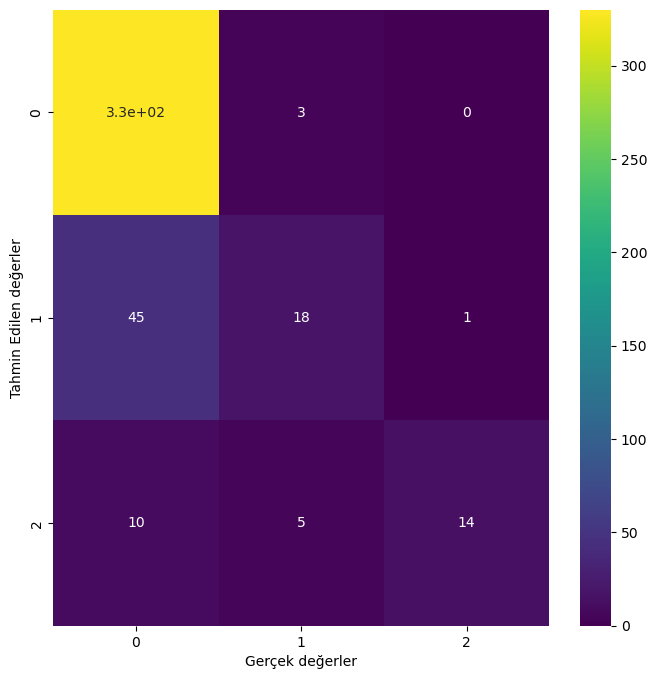

In [103]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, tahmin_lr)
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True, cmap = 'viridis')
plt.xlabel("Gerçek değerler")
plt.ylabel("Tahmin Edilen değerler")
plt.show()

In [104]:
cm

array([[330,   3,   0],
       [ 45,  18,   1],
       [ 10,   5,  14]], dtype=int64)

### Decision Tree

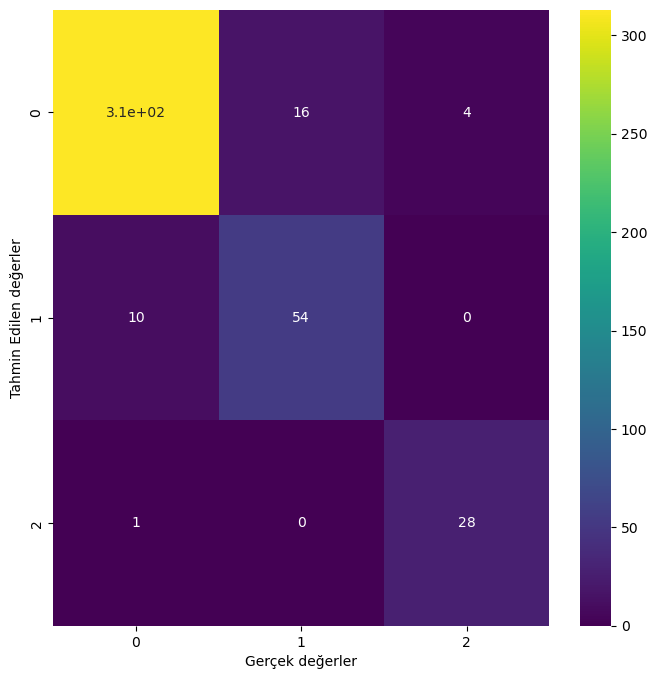

In [106]:
cm=confusion_matrix(y_test, tahmin_dt)
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True, cmap = 'viridis')
plt.xlabel("Gerçek değerler")
plt.ylabel("Tahmin Edilen değerler")
plt.show()

In [107]:
cm

array([[313,  16,   4],
       [ 10,  54,   0],
       [  1,   0,  28]], dtype=int64)

### Random Forest

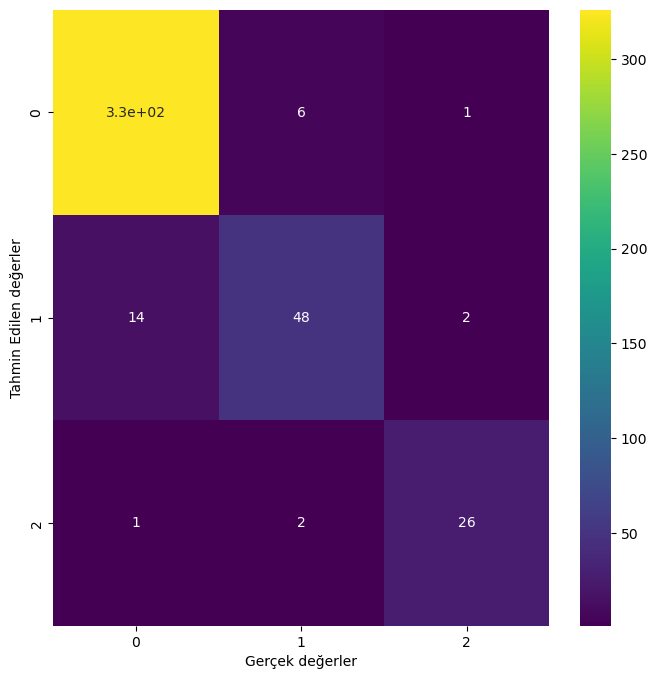

In [109]:
cm=confusion_matrix(y_test, tahmin_rd)
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True, cmap = 'viridis')
plt.xlabel("Gerçek değerler")
plt.ylabel("Tahmin Edilen değerler")
plt.show()

In [110]:
cm

array([[326,   6,   1],
       [ 14,  48,   2],
       [  1,   2,  26]], dtype=int64)

### Naive Bayes

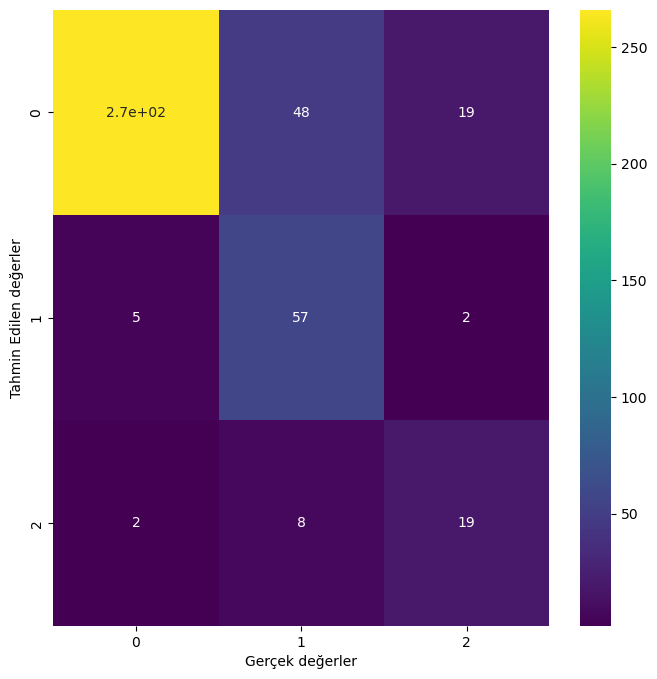

In [112]:
cm=confusion_matrix(y_test, tahmin_nb)
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True, cmap = 'viridis')
plt.xlabel("Gerçek değerler")
plt.ylabel("Tahmin Edilen değerler")
plt.show()

In [113]:
cm

array([[266,  48,  19],
       [  5,  57,   2],
       [  2,   8,  19]], dtype=int64)

### KNN

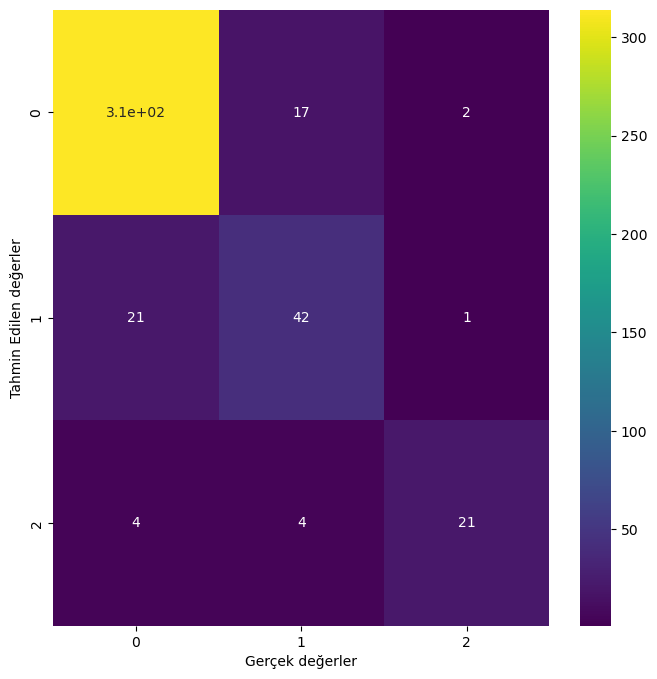

In [115]:
cm=confusion_matrix(y_test, tahmin_knn)
import seaborn as sn
plt.figure(figsize=(8,8))
sn.heatmap(cm, annot=True, cmap = 'viridis')
plt.xlabel("Gerçek değerler")
plt.ylabel("Tahmin Edilen değerler")
plt.show()

In [116]:
cm

array([[314,  17,   2],
       [ 21,  42,   1],
       [  4,   4,  21]], dtype=int64)